### 第一章 - 引言

叙述三个有趣的问题，让学者对概率论这门课程有一个大体的认识。

#### 1.1 生日问题

* 关键点：
  * 必须弄清楚问题是什么（你要成为一名指导具体工作的人，而不是只懂得做代数题的技术员）。
  * 遗漏或重复计算都是概率论中最常见的错误。
  * 事件发生的概率+事件不发生的概率=1（概率是非负的且和为1）
  * 独立事件的概率是可乘的。

* 陈述问题
  * 陈述问题一定要清晰且完整 $\color{yellow}{独立性是概率论中最重要的概念之一}$。
  * 很多时候概率问题需要一些$\color{yellow}{假设}$ ： 假设生日服从$\color{yellow}均{匀分布}$。

* 解决问题
  * 考察一些极端的情况，并试着从中找出与答案有关的信息 - $\color{yellow}{狄利克雷鸽巢原理}$（这往往能缩小答案的范围）。
  * 求解概率的第一种方法，$\color{yellow}{穷举法}$：列举所有可能来找答案，问题量大时计算量也非常大，可以选择较小的量找规律或线索。
  * 计算对立事件的概率$\color{yellow}{互补概率}$：计算事件不发生的概率比计算事件发生的概率更简单时用。
  * 在 n 个人中，所有人的生日都互不相同的概率：
    * $\frac{365}{365}\cdot\frac{364}{365}\cdot\cdot\cdot\frac{365-(n-1)}{365} = \prod\limits_{k=0}^{n-1}\frac{365-k}{365} = \frac{365\cdot364\cdot\cdot\cdot(365-(n-1))}{365^{n}} = \frac{365\cdot364\cdot\cdot\cdot(365-(n-1))}{365^{n}}\cdot\frac{(365-n)!}{(365-n)!} = \frac{365!}{365^{n}\cdot(365-n)!}$

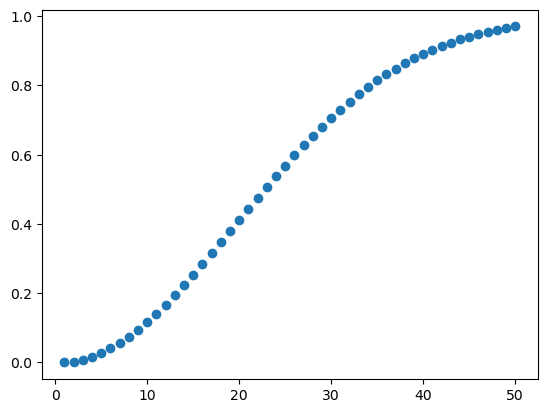

In [9]:
# 计算生日概率的python程序
# 初始化 “生日在同一天” 和 “生日不在同一天” 的概率列表
# 因为递归化需要存储之前的值

import matplotlib.pyplot as plt


noshare = [(1, 1)]   # 开始时，生日不在同一天的概率是100%
share = [(1, 0)]     # 开始时，生日在同一天的概率是0%
currentnoshare = 1   # 当前生日不在同一天的概率

# 将计算前50个人的情况
for n in range(2, 51, 1): 
    # 乘积的第二项
    newfactor = (365 - (n - 1)) / 365
    
    # 更新 “生日不在同一天” 的概率
    currentnoshare = currentnoshare * newfactor
    noshare.append((n, 1.0 - currentnoshare))
    
    # 更新 “生日在同一天” 的概率
    share.append((n, 1.0 - currentnoshare))
    
# print(share)
plt.scatter(*zip(*share))

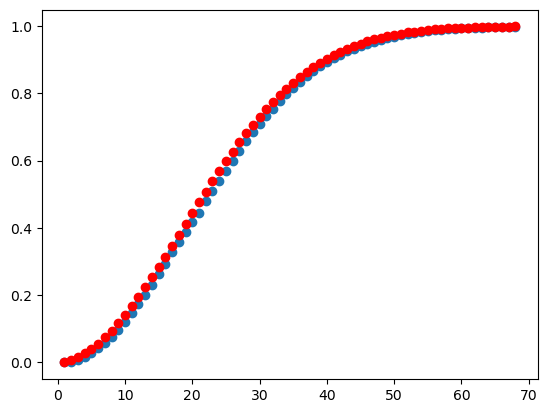

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def _product(d, days_):
    ret = 1
    for k in range(1, d+1, 1):
        ret = ret * (1 - k/days_)
        
    return ret


def birthdaycdf(num_, days_):
    """
    params:
    num_ : 是我们操作的次数
    days_: 是一年的总天数
    """
    numpeople = np.zeros(days_) # 初始化为 d 人中每个人的生日都不在同一天
    
    for n in range(1, num_+1, 1):
        
        share = 0
        bdaylist = [] # 这里将存储房间里人们的生日
        k = 0 # 初始化为 0 个人
        
        while share == 0:
            x = np.random.randint(1, days_, 1) # 随机选择一个新的生日
            
            # 看看新生日是否包含在集合中
            # 如果不包含，则添加；如果包含，则结束
            if x not in bdaylist:
                bdaylist.append(x)
            else:
                share = 1
                
            k = k + 1 # 人数增加 1
            
            # 如果只有一个相同的生日，那么从这个人开始，所有 numpeople 都加 1
            if share == 1:
                for d in range(k, days_, 1):
                    numpeople[d] = numpeople[d] + 1
                    
        
    bdaylistplot = []
    theory_bdaylistplot = []
    
    max_v = 3 * (.5 + np.sqrt(days_ * np.log(4)))
    for d in range(1, int(max_v+1), 1):
        bdaylistplot.append((d, numpeople[d] * 1.0 / num_))
        theory_bdaylistplot.append((d, 1.0 - _product(d, days_)))
        
    plt.scatter(*zip(*bdaylistplot))
    plt.scatter(*zip(*theory_bdaylistplot), c='r')
    
    
birthdaycdf(10000, 365)

#### 1.2 从投篮到几何级数

* 求解不断重复的进程首次成功所需等待时间的分布 - 写出一些概率，然后利用几何级数公式来计算它们的和。  
几何级数的公式：
$\sum\limits_{n=0}^{\infty}r^{n} = 1 + r + r^{2} + r^{3} + \cdot\cdot\cdot = \frac{1}{1 - r}$  

* $\color{yellow}{无记忆进程}$：唯一重要的是我们处于什么状态，而不是我们如何到达那里。
* $\color{yellow}{比较证明法（故事证明法）}$：用一个等价的简单方法求解有难度的问题（前提是两者结论等价）。
* 几何级数的证明：
  * $S_n = 1 + r + r^2 + \cdot\cdot\cdot + r^n , rS_n = r + r^2 + r^3 + \cdot\cdot\cdot + r^{n+1} => rS_n - S_n = 1 - r{n+1} => S_n = \frac{1 - r^{n+1}}{1 - r} => \lim\limits_{n->\infty}S_n = \sum\limits_{n=0}^{\infty}r^n = \frac{1}{1 - r} （|r| < 1）$



import numpy as np

def diamonddraw(num):
    awin = bwin = cwin = 0
    for n in range(1, num):
        diamond = 0
        while diamond == 0:
            c1 = np.random.randint(1, 52)
            c2 = np.random.randint(1, 52)
            c3 = np.random.randint(1, 52)

            if c1 <= 13 or c2 <= 13 or c3 <= 13:
                diamond = 1

            if diamond == 1:
                if c1 <= 13:
                    awin += 1
                else:
                    if c2 <= 13:
                        bwin += 1
                    else:
                        if c3 <= 13:
                            cwin += 1
    print(f"Here are the observed probabilities from {num} games.")
    print(f"Percent Alice won(approx): {awin / num * 100.}%" )
    print(f"Percent Bob won(approx): {bwin / num * 100.}%" )
    print(f"Percent Charlie won(approx): {cwin / num * 100.}%" )
    print(f"Predictions (from our bad logic) were approx {1600./37} {4800./175} {900./37}")

diamonddraw(1000000)

一般问题求解策略：
* 清晰的定义问题，小心隐藏的假设。
* 选择合适的符号，使内容一目了然。
* 通过考察一些特殊的情形来建立对问题的直观感觉（先学会走，再学跑），从简单情形中找出规律。

#### 1.3 赌博

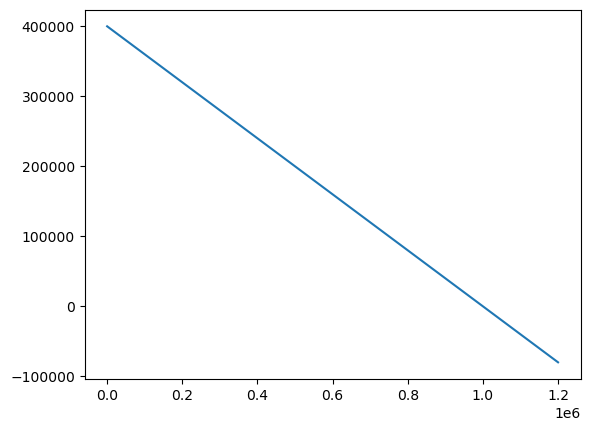

In [14]:
import matplotlib.pyplot as plt
import numpy as np

p = 0.8
x = 3

B = []
Y = []
for i in range(0, 7):
    B.append(200000 * i)
    Y.append(p * 500000 + (1 - p) * x * B[i] - 500 - B[i])

plt.plot(B, Y)

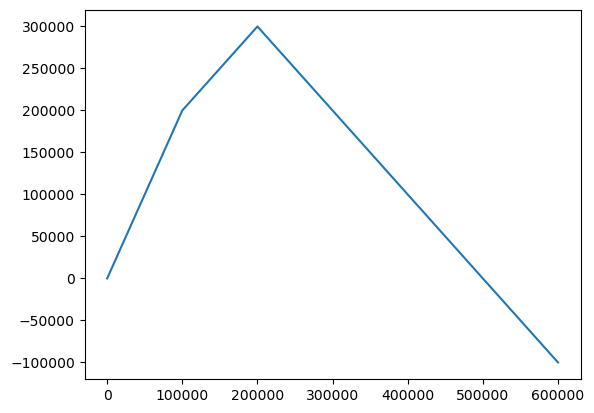

In [16]:
import matplotlib.pyplot as plt
import numpy as np

p = 0.8
x = 3

B = []
Y = []
for i in range(0, 7):
    B.append(100000 * i)
    Y.append(min(500000, x * B[i]) - 500 - B[i])

plt.plot(B, Y)